# 1 生成对象

In [1]:
import numpy as np
import pandas as pd

#### 用列表生成Series

In [2]:
s = [1,3,5,7,np.nan,10]
a = pd.Series(s)
a

0     1.0
1     3.0
2     5.0
3     7.0
4     NaN
5    10.0
dtype: float64

In [3]:
a[2]

5.0

In [4]:
b = pd.Series(s, index= ['a','b','c','d','e','f'])
b

a     1.0
b     3.0
c     5.0
d     7.0
e     NaN
f    10.0
dtype: float64

In [5]:
b['c']

5.0

###### 用key/values生成series

In [9]:
sites = {1: "Google", 2: "Runoob", 3: "Wiki"}
pd.Series(sites)

1    Google
2    Runoob
3      Wiki
dtype: object

###### 如果只需要字典中的一部分数据，只需要指定需要数据的索引即可，

In [10]:
pd.Series(sites,index=[1,2])

1    Google
2    Runoob
dtype: object

###### 设置 Series 名称参数

In [11]:
pd.Series(sites,name = 'edc')

1    Google
2    Runoob
3      Wiki
Name: edc, dtype: object

##### 用series，字典， 对象生成DataFrame
pandas.DataFrame( data, index, columns, dtype, copy)

data：一组数据(ndarray、series, map, lists, dict 等类型)。

index：索引值，或者可以称为行标签。

columns：列标签，默认为 RangeIndex (0, 1, 2, …, n) 。

dtype：数据类型。

copy：拷贝数据，默认为 False。

In [12]:
df1 = pd.DataFrame({'A':[1.0, 2.0,3.0,4.0],
                   'B':pd.Timestamp('20220808'),
                   'C':pd.Series([11,22,33,44], index = ['a','b','c','d'], dtype='float32'),
                   'D':np.linspace(2,10,4),
                   'E':pd.Categorical(['aa','bb','cc','dd']),
                   'F':'foo'})

In [13]:
df1

,A,B,C,D,E,F
a,1.0,2022-08-08,11.0,2.000000,aa,foo
b,2.0,2022-08-08,22.0,4.666667,bb,foo
c,3.0,2022-08-08,33.0,7.333333,cc,foo
d,4.0,2022-08-08,44.0,10.000000,dd,foo


##### 用含时间日期的索引、标签、numpy数组生成DataFrame

In [14]:
d = pd.date_range('20220808',periods = 6)
d

DatetimeIndex(['2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
               '2022-08-12', '2022-08-13'],
              dtype='datetime64[ns]', freq='D')

###### random.randn生成的随机数服从正态分布

In [16]:
df2 = pd.DataFrame(np.random.randn(6,4),index = d, columns=['QAZ','WSX','EDC','RFV'])

In [17]:
df2

,QAZ,WSX,EDC,RFV
2022-08-08,-1.101574,1.511857,-0.728785,-2.263620
2022-08-09,2.294041,0.261550,1.032446,-0.042326
2022-08-10,0.041847,2.426805,-0.649670,-3.173740
2022-08-11,0.282749,0.334039,0.442546,-0.049118
2022-08-12,1.066896,-1.506492,-1.203235,-0.314148
2022-08-13,-0.844169,-0.960629,-1.545463,1.298053


###### 使用类似key\values创建

In [18]:
data = {'Site':['Google', 'Runoob', 'Wiki'], 'Age':[10, 12, 13]}
pd.DataFrame(data)

,Site,Age
0,Google,10
1,Runoob,12
2,Wiki,13


###### 使用字典创建，没有对应的部分数据为 NaN。

In [19]:
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [20]:
data1 = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}
df3 = pd.DataFrame(data1)
df3

,calories,duration
0,420,50
1,380,40
2,390,45


###### loc返回结果其实就是一个 Pandas Series 数据。

In [21]:
df3.loc[0]

calories    420
duration     50
Name: 0, dtype: int64

In [22]:
df2.loc['2022-08-08']

QAZ   -1.101574
WSX    1.511857
EDC   -0.728785
RFV   -2.263620
Name: 2022-08-08 00:00:00, dtype: float64

# 2 查看数据

###### 查看数据类型

In [23]:
df1.dtypes

A           float64
B    datetime64[ns]
C           float32
D           float64
E          category
F            object
dtype: object

In [24]:
df2

,QAZ,WSX,EDC,RFV
2022-08-08,-1.101574,1.511857,-0.728785,-2.263620
2022-08-09,2.294041,0.261550,1.032446,-0.042326
2022-08-10,0.041847,2.426805,-0.649670,-3.173740
2022-08-11,0.282749,0.334039,0.442546,-0.049118
2022-08-12,1.066896,-1.506492,-1.203235,-0.314148
2022-08-13,-0.844169,-0.960629,-1.545463,1.298053


In [25]:
df2.dtypes

QAZ    float64
WSX    float64
EDC    float64
RFV    float64
dtype: object

In [26]:
df2.loc['2022-08-10']

QAZ    0.041847
WSX    2.426805
EDC   -0.649670
RFV   -3.173740
Name: 2022-08-10 00:00:00, dtype: float64

In [27]:
df2.loc[['2022-08-10']]

,QAZ,WSX,EDC,RFV
2022-08-10,0.041847,2.426805,-0.64967,-3.17374


In [29]:
df2.loc[['2022-08-10', '2022-08-13']]

,QAZ,WSX,EDC,RFV
2022-08-10,0.041847,2.426805,-0.649670,-3.173740
2022-08-13,-0.844169,-0.960629,-1.545463,1.298053


######  查看DataFrame头部尾部数据

In [30]:
#查看头部**条
df2.head(2) 

,QAZ,WSX,EDC,RFV
2022-08-08,-1.101574,1.511857,-0.728785,-2.263620
2022-08-09,2.294041,0.261550,1.032446,-0.042326


In [31]:
df2.tail(2) # 查看尾部**条

,QAZ,WSX,EDC,RFV
2022-08-12,1.066896,-1.506492,-1.203235,-0.314148
2022-08-13,-0.844169,-0.960629,-1.545463,1.298053


In [32]:
# 查看索引
df2.index

DatetimeIndex(['2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
               '2022-08-12', '2022-08-13'],
              dtype='datetime64[ns]', freq='D')

In [33]:
#查看列名
df2.columns

Index(['QAZ', 'WSX', 'EDC', 'RFV'], dtype='object')

In [34]:
#查看数据统计概要
df2.describe()

,QAZ,WSX,EDC,RFV
count,6.000000,6.000000,6.000000,6.000000
mean,0.289965,0.344522,-0.442027,-0.757483
std,1.257314,1.472090,0.987815,1.645707
min,-1.101574,-1.506492,-1.545463,-3.173740
25%,-0.622665,-0.655084,-1.084622,-1.776252
50%,0.162298,0.297794,-0.689228,-0.181633
75%,0.870860,1.217402,0.169492,-0.044024
max,2.294041,2.426805,1.032446,1.298053


In [35]:
df1

,A,B,C,D,E,F
a,1.0,2022-08-08,11.0,2.000000,aa,foo
b,2.0,2022-08-08,22.0,4.666667,bb,foo
c,3.0,2022-08-08,33.0,7.333333,cc,foo
d,4.0,2022-08-08,44.0,10.000000,dd,foo


In [36]:
df1.describe()

,A,C,D
count,4.000000,4.000000,4.000000
mean,2.500000,27.500000,6.000000
std,1.290994,14.200939,3.442652
min,1.000000,11.000000,2.000000
25%,1.750000,19.250000,4.000000
50%,2.500000,27.500000,6.000000
75%,3.250000,35.750000,8.000000
max,4.000000,44.000000,10.000000


# 3 排序

In [37]:
times = pd.date_range('20220812',periods = 6)

In [38]:
times

DatetimeIndex(['2022-08-12', '2022-08-13', '2022-08-14', '2022-08-15',
               '2022-08-16', '2022-08-17'],
              dtype='datetime64[ns]', freq='D')

In [39]:
datas = np.random.randn(6,4)

In [40]:
datas

array([[ 0.600686  ,  0.07108335, -0.34627662, -1.62411973],
       [-0.37962858, -1.33964624, -1.09125386, -0.62753243],
       [-0.42162649,  1.24836768, -1.33367594,  1.82715069],
       [ 1.18985903,  0.33415231,  0.72214977, -0.17762816],
       [-1.95719823,  1.49637093, -1.57027794,  1.9435707 ],
       [ 1.44695909,  0.73188546, -0.8324306 ,  0.53871032]])

In [41]:
df = pd.DataFrame(datas, index = times,columns=['A', 'B','C','D'])

In [42]:
df

,A,B,C,D
2022-08-12,0.600686,0.071083,-0.346277,-1.624120
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532
2022-08-14,-0.421626,1.248368,-1.333676,1.827151
2022-08-15,1.189859,0.334152,0.722150,-0.177628
2022-08-16,-1.957198,1.496371,-1.570278,1.943571
2022-08-17,1.446959,0.731885,-0.832431,0.538710


In [43]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.079842,0.423702,-0.741961,0.313359
std,1.263688,1.016605,0.832660,1.405710
min,-1.957198,-1.339646,-1.570278,-1.624120
25%,-0.411127,0.136851,-1.273070,-0.515056
50%,0.110529,0.533019,-0.961842,0.180541
75%,1.042566,1.119247,-0.467815,1.505041
max,1.446959,1.496371,0.722150,1.943571


### 排序

###### 按列排列 axis = 1

In [45]:
df.sort_index(axis = 1,ascending = False)

,D,C,B,A
2022-08-12,-1.624120,-0.346277,0.071083,0.600686
2022-08-13,-0.627532,-1.091254,-1.339646,-0.379629
2022-08-14,1.827151,-1.333676,1.248368,-0.421626
2022-08-15,-0.177628,0.722150,0.334152,1.189859
2022-08-16,1.943571,-1.570278,1.496371,-1.957198
2022-08-17,0.538710,-0.832431,0.731885,1.446959


In [46]:
df.sort_index(axis = 1,ascending = True)

,A,B,C,D
2022-08-12,0.600686,0.071083,-0.346277,-1.624120
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532
2022-08-14,-0.421626,1.248368,-1.333676,1.827151
2022-08-15,1.189859,0.334152,0.722150,-0.177628
2022-08-16,-1.957198,1.496371,-1.570278,1.943571
2022-08-17,1.446959,0.731885,-0.832431,0.538710


按行排列  axis = 0

In [47]:
df.sort_index(axis = 0,ascending = False)

,A,B,C,D
2022-08-17,1.446959,0.731885,-0.832431,0.538710
2022-08-16,-1.957198,1.496371,-1.570278,1.943571
2022-08-15,1.189859,0.334152,0.722150,-0.177628
2022-08-14,-0.421626,1.248368,-1.333676,1.827151
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532
2022-08-12,0.600686,0.071083,-0.346277,-1.624120


## 数据选择

#### １　按标签选择

In [48]:
df[['A']]

,A
2022-08-12,0.600686
2022-08-13,-0.379629
2022-08-14,-0.421626
2022-08-15,1.189859
2022-08-16,-1.957198
2022-08-17,1.446959


In [49]:
df['A']

2022-08-12    0.600686
2022-08-13   -0.379629
2022-08-14   -0.421626
2022-08-15    1.189859
2022-08-16   -1.957198
2022-08-17    1.446959
Freq: D, Name: A, dtype: float64

#### 切片行

In [50]:
df[1:3]

,A,B,C,D
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532
2022-08-14,-0.421626,1.248368,-1.333676,1.827151


In [51]:
df['2022-08-13':'2022-08-15']

,A,B,C,D
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532
2022-08-14,-0.421626,1.248368,-1.333676,1.827151
2022-08-15,1.189859,0.334152,0.722150,-0.177628


按标签选择

In [52]:
df.loc[['2022-08-12','2022-08-16']]

,A,B,C,D
2022-08-12,0.600686,0.071083,-0.346277,-1.624120
2022-08-16,-1.957198,1.496371,-1.570278,1.943571


In [53]:
df.loc[['2022-08-12']]

,A,B,C,D
2022-08-12,0.600686,0.071083,-0.346277,-1.62412


In [54]:
df.loc['2022-08-12']

A    0.600686
B    0.071083
C   -0.346277
D   -1.624120
Name: 2022-08-12 00:00:00, dtype: float64

In [55]:
# 提取多列数据
df.loc[:,'A':'C']

,A,B,C
2022-08-12,0.600686,0.071083,-0.346277
2022-08-13,-0.379629,-1.339646,-1.091254
2022-08-14,-0.421626,1.248368,-1.333676
2022-08-15,1.189859,0.334152,0.722150
2022-08-16,-1.957198,1.496371,-1.570278
2022-08-17,1.446959,0.731885,-0.832431


In [56]:
# 标签切片
df.loc[['2022-08-12','2022-08-16'],['A','C']]

,A,C
2022-08-12,0.600686,-0.346277
2022-08-16,-1.957198,-1.570278


In [57]:
df.loc[:,'A']

2022-08-12    0.600686
2022-08-13   -0.379629
2022-08-14   -0.421626
2022-08-15    1.189859
2022-08-16   -1.957198
2022-08-17    1.446959
Freq: D, Name: A, dtype: float64

In [58]:
df['A']

2022-08-12    0.600686
2022-08-13   -0.379629
2022-08-14   -0.421626
2022-08-15    1.189859
2022-08-16   -1.957198
2022-08-17    1.446959
Freq: D, Name: A, dtype: float64

In [59]:
# 单独选择某一格数据
df.loc['2022-08-14','B']

1.248367682934586

In [60]:
df.at['2022-08-14','B']

1.248367682934586

#### 按位置取 

In [61]:
df

,A,B,C,D
2022-08-12,0.600686,0.071083,-0.346277,-1.624120
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532
2022-08-14,-0.421626,1.248368,-1.333676,1.827151
2022-08-15,1.189859,0.334152,0.722150,-0.177628
2022-08-16,-1.957198,1.496371,-1.570278,1.943571
2022-08-17,1.446959,0.731885,-0.832431,0.538710


In [62]:
#　取第一行数据
df.iloc[1]

A   -0.379629
B   -1.339646
C   -1.091254
D   -0.627532
Name: 2022-08-13 00:00:00, dtype: float64

In [67]:
#　取1-3行，1-3列数据
df.iloc[1:4, 1:4]

,B,C,D
2022-08-13,-1.339646,-1.091254,-0.627532
2022-08-14,1.248368,-1.333676,1.827151
2022-08-15,0.334152,0.722150,-0.177628


In [68]:
# 按整数来取
df.iloc[[1,3,5], [0,2]]

,A,C
2022-08-13,-0.379629,-1.091254
2022-08-15,1.189859,0.722150
2022-08-17,1.446959,-0.832431


In [69]:
df.iloc[:, [1,3]]

,B,D
2022-08-12,0.071083,-1.624120
2022-08-13,-1.339646,-0.627532
2022-08-14,1.248368,1.827151
2022-08-15,0.334152,-0.177628
2022-08-16,1.496371,1.943571
2022-08-17,0.731885,0.538710


In [70]:
# 快速取值
df.iloc[1,1]

-1.3396462410230991

In [71]:
df.iat[1,1]

-1.3396462410230991

### 3 筛选

In [72]:
df

,A,B,C,D
2022-08-12,0.600686,0.071083,-0.346277,-1.624120
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532
2022-08-14,-0.421626,1.248368,-1.333676,1.827151
2022-08-15,1.189859,0.334152,0.722150,-0.177628
2022-08-16,-1.957198,1.496371,-1.570278,1.943571
2022-08-17,1.446959,0.731885,-0.832431,0.538710


In [73]:
df[df['B']>0]

,A,B,C,D
2022-08-12,0.600686,0.071083,-0.346277,-1.624120
2022-08-14,-0.421626,1.248368,-1.333676,1.827151
2022-08-15,1.189859,0.334152,0.722150,-0.177628
2022-08-16,-1.957198,1.496371,-1.570278,1.943571
2022-08-17,1.446959,0.731885,-0.832431,0.538710


In [74]:
df['B']>0

2022-08-12     True
2022-08-13    False
2022-08-14     True
2022-08-15     True
2022-08-16     True
2022-08-17     True
Freq: D, Name: B, dtype: bool

In [75]:
df[df<0]

,A,B,C,D
2022-08-12,NaN,NaN,-0.346277,-1.624120
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532
2022-08-14,-0.421626,NaN,-1.333676,NaN
2022-08-15,NaN,NaN,NaN,-0.177628
2022-08-16,-1.957198,NaN,-1.570278,NaN
2022-08-17,NaN,NaN,-0.832431,NaN


In [93]:
# 用isin()筛选
df5 = df.copy()
df5

,A,B,C,D
2022-08-12,0.600686,0.071083,-0.346277,-1.624120
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532
2022-08-14,-0.421626,1.248368,-1.333676,1.827151
2022-08-15,1.189859,0.334152,0.722150,-0.177628
2022-08-16,-1.957198,1.496371,-1.570278,1.943571
2022-08-17,1.446959,0.731885,-0.832431,0.538710


In [94]:
df5['E']=['qaz','wsx','edc','rfv','tgb','yhn']
df5

,A,B,C,D,E
2022-08-12,0.600686,0.071083,-0.346277,-1.624120,qaz
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532,wsx
2022-08-14,-0.421626,1.248368,-1.333676,1.827151,edc
2022-08-15,1.189859,0.334152,0.722150,-0.177628,rfv
2022-08-16,-1.957198,1.496371,-1.570278,1.943571,tgb
2022-08-17,1.446959,0.731885,-0.832431,0.538710,yhn


In [95]:
df5[df5['E'].isin(['edc','yhn'])]

,A,B,C,D,E
2022-08-14,-0.421626,1.248368,-1.333676,1.827151,edc
2022-08-17,1.446959,0.731885,-0.832431,0.538710,yhn


In [96]:
df5['E'].isin(['edc','yhn'])

2022-08-12    False
2022-08-13    False
2022-08-14     True
2022-08-15    False
2022-08-16    False
2022-08-17     True
Freq: D, Name: E, dtype: bool

In [97]:
#删除含‘***’的行
df5[~df5['E'].isin(['edc','yhn'])]

,A,B,C,D,E
2022-08-12,0.600686,0.071083,-0.346277,-1.624120,qaz
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532,wsx
2022-08-15,1.189859,0.334152,0.722150,-0.177628,rfv
2022-08-16,-1.957198,1.496371,-1.570278,1.943571,tgb


#### 赋值

In [98]:
# 索引自动对齐
data1 = pd.Series(np.arange(6),index = times)

In [99]:
data1

2022-08-12    0
2022-08-13    1
2022-08-14    2
2022-08-15    3
2022-08-16    4
2022-08-17    5
Freq: D, dtype: int32

In [100]:
df5['E'] = data1

In [101]:
df5

,A,B,C,D,E
2022-08-12,0.600686,0.071083,-0.346277,-1.624120,0
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532,1
2022-08-14,-0.421626,1.248368,-1.333676,1.827151,2
2022-08-15,1.189859,0.334152,0.722150,-0.177628,3
2022-08-16,-1.957198,1.496371,-1.570278,1.943571,4
2022-08-17,1.446959,0.731885,-0.832431,0.538710,5


In [103]:
data2 = pd.Series(np.linspace(1,10,6),index = times)
data2

2022-08-12     1.0
2022-08-13     2.8
2022-08-14     4.6
2022-08-15     6.4
2022-08-16     8.2
2022-08-17    10.0
Freq: D, dtype: float64

In [104]:
df5['Q'] = data2
df5

,A,B,C,D,E,Q
2022-08-12,0.600686,0.071083,-0.346277,-1.624120,0,1.0
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532,1,2.8
2022-08-14,-0.421626,1.248368,-1.333676,1.827151,2,4.6
2022-08-15,1.189859,0.334152,0.722150,-0.177628,3,6.4
2022-08-16,-1.957198,1.496371,-1.570278,1.943571,4,8.2
2022-08-17,1.446959,0.731885,-0.832431,0.538710,5,10.0


In [105]:
# 按标签赋值
df5.at['2022-08-15', 'B'] = 2
df5

,A,B,C,D,E,Q
2022-08-12,0.600686,0.071083,-0.346277,-1.624120,0,1.0
2022-08-13,-0.379629,-1.339646,-1.091254,-0.627532,1,2.8
2022-08-14,-0.421626,1.248368,-1.333676,1.827151,2,4.6
2022-08-15,1.189859,2.000000,0.722150,-0.177628,3,6.4
2022-08-16,-1.957198,1.496371,-1.570278,1.943571,4,8.2
2022-08-17,1.446959,0.731885,-0.832431,0.538710,5,10.0


In [106]:
# 按位置赋值
df5.iat[1,3] = 7
df5

,A,B,C,D,E,Q
2022-08-12,0.600686,0.071083,-0.346277,-1.624120,0,1.0
2022-08-13,-0.379629,-1.339646,-1.091254,7.000000,1,2.8
2022-08-14,-0.421626,1.248368,-1.333676,1.827151,2,4.6
2022-08-15,1.189859,2.000000,0.722150,-0.177628,3,6.4
2022-08-16,-1.957198,1.496371,-1.570278,1.943571,4,8.2
2022-08-17,1.446959,0.731885,-0.832431,0.538710,5,10.0


In [107]:
# 按数组赋值
df5['E'] = [1,3,5,7,9,11]
df5

,A,B,C,D,E,Q
2022-08-12,0.600686,0.071083,-0.346277,-1.624120,1,1.0
2022-08-13,-0.379629,-1.339646,-1.091254,7.000000,3,2.8
2022-08-14,-0.421626,1.248368,-1.333676,1.827151,5,4.6
2022-08-15,1.189859,2.000000,0.722150,-0.177628,7,6.4
2022-08-16,-1.957198,1.496371,-1.570278,1.943571,9,8.2
2022-08-17,1.446959,0.731885,-0.832431,0.538710,11,10.0


In [108]:
# 按numpy数值赋值
df5['D'] = np.array([5]*len(df))
df5

,A,B,C,D,E,Q
2022-08-12,0.600686,0.071083,-0.346277,5,1,1.0
2022-08-13,-0.379629,-1.339646,-1.091254,5,3,2.8
2022-08-14,-0.421626,1.248368,-1.333676,5,5,4.6
2022-08-15,1.189859,2.000000,0.722150,5,7,6.4
2022-08-16,-1.957198,1.496371,-1.570278,5,9,8.2
2022-08-17,1.446959,0.731885,-0.832431,5,11,10.0


In [112]:
# 条件赋值
df6 = df5.copy()
df6[df6<0] = 1

In [136]:
df6

,A,B,C,D,E,Q
2022-08-12,0.600686,0.071083,1.00000,5,1,1.0
2022-08-13,1.000000,1.000000,1.00000,5,3,2.8
2022-08-14,1.000000,1.248368,1.00000,5,5,4.6
2022-08-15,1.189859,2.000000,0.72215,5,7,6.4
2022-08-16,1.000000,1.496371,1.00000,5,9,8.2
2022-08-17,1.446959,0.731885,1.00000,5,11,10.0


### 空值

In [230]:
df1 = pd.DataFrame(np.random.randn(6,6), index=pd.date_range('20180710',periods = 6),columns=['A','B','C','D','E','F'])
df1

,A,B,C,D,E,F
2018-07-10,-0.030835,0.045333,-0.697468,0.698666,-0.533489,1.284631
2018-07-11,1.032256,-1.419444,0.500069,-1.614550,-2.082584,-1.045310
2018-07-12,-1.003525,0.282530,-1.553403,-1.377025,1.271417,0.585634
2018-07-13,-1.110897,0.558710,-0.990184,0.072694,0.504324,-0.341328
2018-07-14,0.398253,-1.535519,-0.902414,-0.340021,-1.122569,0.243408
2018-07-15,-2.290576,1.587457,0.554614,1.332749,0.591556,-0.725547


In [231]:
df2 = df1.reindex(index=list(df1.index[1:5]), columns=list(df1.columns[0:5])+['G'])
df2

,A,B,C,D,E,G
2018-07-11,1.032256,-1.419444,0.500069,-1.614550,-2.082584,NaN
2018-07-12,-1.003525,0.282530,-1.553403,-1.377025,1.271417,NaN
2018-07-13,-1.110897,0.558710,-0.990184,0.072694,0.504324,NaN
2018-07-14,0.398253,-1.535519,-0.902414,-0.340021,-1.122569,NaN


In [232]:
df2.iloc[0:2,3:6]=1
df2

,A,B,C,D,E,G
2018-07-11,1.032256,-1.419444,0.500069,1.000000,1.000000,1.0
2018-07-12,-1.003525,0.282530,-1.553403,1.000000,1.000000,1.0
2018-07-13,-1.110897,0.558710,-0.990184,0.072694,0.504324,NaN
2018-07-14,0.398253,-1.535519,-0.902414,-0.340021,-1.122569,NaN


## dropna()

In [233]:
#删除含空值的行
df2.dropna(how = 'any')

,A,B,C,D,E,G
2018-07-11,1.032256,-1.419444,0.500069,1.0,1.0,1.0
2018-07-12,-1.003525,0.282530,-1.553403,1.0,1.0,1.0


In [234]:
df2

,A,B,C,D,E,G
2018-07-11,1.032256,-1.419444,0.500069,1.000000,1.000000,1.0
2018-07-12,-1.003525,0.282530,-1.553403,1.000000,1.000000,1.0
2018-07-13,-1.110897,0.558710,-0.990184,0.072694,0.504324,NaN
2018-07-14,0.398253,-1.535519,-0.902414,-0.340021,-1.122569,NaN


In [151]:
# 将空值改为5
df2.fillna(value = 5)

,A,B,C,D,E,G
2018-07-11,-1.197353,0.587988,-1.494831,1.000000,1.000000,1.0
2018-07-12,-1.055653,-0.692058,-1.160954,1.000000,1.000000,1.0
2018-07-13,-0.274666,-0.332940,1.353447,-1.413285,-0.608587,5.0
2018-07-14,0.312902,-0.489170,-1.124347,-0.322118,0.157628,5.0


In [152]:
# 判断是否空值
pd.isna(df2)

,A,B,C,D,E,G
2018-07-11,False,False,False,False,False,False
2018-07-12,False,False,False,False,False,False
2018-07-13,False,False,False,False,False,True
2018-07-14,False,False,False,False,False,True


#  运算

#### 算术运算

In [153]:
df1 = pd.DataFrame(np.random.randn(2,3))
df1

,0,1,2
0,2.616112,-1.755140,1.260504
1,0.032368,0.201819,0.532806


In [154]:
df2 = pd.DataFrame(np.random.randn(3,4))
df2

,0,1,2,3
0,0.834925,1.158482,-0.028214,1.097256
1,0.418370,-0.601818,-0.337073,-0.561916
2,-0.784030,-1.883548,-0.953113,-1.779469


In [155]:
print('df1+df2\n',df1+df2)
print('df1-df2\n',df1-df2)
print('df1*df2\n',df1*df2)
print('df1/df2\n',df1/df2)

df1+df2
           0         1         2   3
0  3.451037 -0.596658  1.232291 NaN
1  0.450737 -0.399999  0.195733 NaN
2       NaN       NaN       NaN NaN
df1-df2
           0         1         2   3
0  1.781188 -2.913622  1.288718 NaN
1 -0.386002  0.803638  0.869879 NaN
2       NaN       NaN       NaN NaN
df1*df2
           0         1         2   3
0  2.184257 -2.033298 -0.035564 NaN
1  0.013542 -0.121459 -0.179594 NaN
2       NaN       NaN       NaN NaN
df1/df2
           0         1          2   3
0  3.133351 -1.515034 -44.676956 NaN
1  0.077366 -0.335349  -1.580686 NaN
2       NaN       NaN        NaN NaN


#### 比较操作

In [199]:
print('df1=df2\n',df1.eq(df2))
print('df1!=df2\n',df1.ne(df2))
print('df1>df2\n',df1.gt(df2))
print('df1<df2\n',df1.lt(df2))
print('df1>=df2\n',df1.ge(df2))
print('df1<=df2\n',df1.le(df2))

df1=df2
        0      1      2      3
0  False  False  False  False
1  False  False  False  False
2  False  False  False  False
df1!=df2
       0     1     2     3
0  True  True  True  True
1  True  True  True  True
2  True  True  True  True
df1>df2
        0      1      2      3
0  False  False   True  False
1  False  False   True  False
2  False  False  False  False
df1<df2
        0      1      2      3
0   True   True  False  False
1   True   True  False  False
2  False  False  False  False
df1>=df2
        0      1      2      3
0  False  False   True  False
1  False  False   True  False
2  False  False  False  False
df1<=df2
        0      1      2      3
0   True   True  False  False
1   True   True  False  False
2  False  False  False  False


#### 统计
https://zhuanlan.zhihu.com/p/486195805

In [156]:
df2

,0,1,2,3
0,0.834925,1.158482,-0.028214,1.097256
1,0.418370,-0.601818,-0.337073,-0.561916
2,-0.784030,-1.883548,-0.953113,-1.779469


In [157]:
# 取平均值
df2.mean()

0    0.156422
1   -0.442295
2   -0.439466
3   -0.414710
dtype: float64

In [158]:
# 累加
df2.cumsum()

,0,1,2,3
0,0.834925,1.158482,-0.028214,1.097256
1,1.253294,0.556664,-0.365286,0.535340
2,0.469265,-1.326884,-1.318399,-1.244129


#  合并concat

上下合并

In [160]:
pd.concat([df1,df2])

,0,1,2,3
0,2.616112,-1.755140,1.260504,NaN
1,0.032368,0.201819,0.532806,NaN
0,0.834925,1.158482,-0.028214,1.097256
1,0.418370,-0.601818,-0.337073,-0.561916
2,-0.784030,-1.883548,-0.953113,-1.779469


连接join
左右连接

In [161]:
left = pd.DataFrame({'key':['qaz','edc','edc'],'left_value':[1,3,5]})
left

,key,left_value
0,qaz,1
1,edc,3
2,edc,5


In [162]:
right = pd.DataFrame({'key':['qaz','edc','edc'],'right_value':[2,4,6]})
right

,key,right_value
0,qaz,2
1,edc,4
2,edc,6


qaz 1\*1只有一行
edc2\*2=4行

In [163]:
pd.merge(left, right, on = 'key')

,key,left_value,right_value
0,qaz,1,2
1,edc,3,4
2,edc,3,6
3,edc,5,4
4,edc,5,6


追加

In [164]:
df = pd.DataFrame(np.random.randn(4,4),columns=['A','B','C','D'], index = ['a','b','c','d'])
df

,A,B,C,D
a,0.327355,0.276845,-0.623155,-1.269151
b,-0.801864,0.948302,0.421042,0.948238
c,-2.036615,0.917767,0.716813,0.619192
d,-0.127577,-0.035114,2.569107,0.932811


In [167]:
s = df.iloc[[2]]
s

,A,B,C,D
c,-2.036615,0.917767,0.716813,0.619192


ignore_index：boolean，default False。如果为True，忽略原来索引，请不要使用并置轴上的索引值。结果轴将被标记为0，...，n-1。如果要连接其中并置轴没有有意义的索引信息的对象，这将非常有用。注意，其他轴上的索引值在连接中仍然受到尊重。

https://blog.csdn.net/zzpdbk/article/details/79232661

In [168]:
pd.concat([df,s],ignore_index = True)

,A,B,C,D
0,0.327355,0.276845,-0.623155,-1.269151
1,-0.801864,0.948302,0.421042,0.948238
2,-2.036615,0.917767,0.716813,0.619192
3,-0.127577,-0.035114,2.569107,0.932811
4,-2.036615,0.917767,0.716813,0.619192


In [169]:
pd.concat([df,s], ignore_index = False)

,A,B,C,D
a,0.327355,0.276845,-0.623155,-1.269151
b,-0.801864,0.948302,0.421042,0.948238
c,-2.036615,0.917767,0.716813,0.619192
d,-0.127577,-0.035114,2.569107,0.932811
c,-2.036615,0.917767,0.716813,0.619192


## 分组Group
https://zhuanlan.zhihu.com/p/101284491

![jupyter](./group.jpg)

In [171]:
df = pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','bar'],
                   'B':['one','two','three','four','one','two','three','four'],
                   'C':np.random.randn(8),
                   'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.250565,1.761678
1,bar,two,-0.956355,1.088234
2,foo,three,-0.507857,-1.243649
3,bar,four,-0.018743,-1.665442
4,foo,one,0.150641,-0.836514
5,bar,two,0.602117,0.397127
6,foo,three,-1.372310,-1.165179
7,bar,four,0.398037,-0.427385


In [172]:
df.groupby('A').sum()

,C,D
A,,
bar,0.025056,-0.607466
foo,-1.980090,-1.483663


In [297]:
df.groupby('B').sum()

,C,D
B,,
four,0.159905,0.839289
one,1.474164,0.545007
three,-2.220918,1.405543
two,-0.071157,0.724120


In [298]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar four   0.159905  0.839289
    two   -0.071157  0.724120
foo one    1.474164  0.545007
    three -2.220918  1.405543

#### 数据透视表
https://www.cnblogs.com/Yanjy-OnlyOne/p/11195621.html


In [179]:
df = pd.DataFrame({'A':['one','two','three','four']*3,
                   'B':['A','B','C']*4,
                   'C':['foo','foo','foo','bar','bar','bar']*2,
                   'D':np.random.randn(12),
                   'E':np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.993760,-1.013403
1,two,B,foo,-0.102660,0.455470
2,three,C,foo,0.958793,1.996393
3,four,A,bar,1.047513,0.581721
4,one,B,bar,-0.106129,0.190211
5,two,C,bar,-0.956222,-1.455863
6,three,A,foo,-0.815535,1.101698
7,four,B,foo,-0.993205,-1.615083
8,one,C,foo,-1.193132,0.364803
9,two,A,bar,-1.249879,2.227288


In [184]:
pd.pivot_table(df,values='D',index=['A', 'B'],columns=['C'])

C             bar       foo
A     B                    
four  A  1.047513       NaN
      B       NaN -0.993205
      C  0.466385       NaN
one   A       NaN  1.993760
      B -0.106129       NaN
      C       NaN -1.193132
three A       NaN -0.815535
      B  0.184976       NaN
      C       NaN  0.958793
two   A -1.249879       NaN
      B       NaN -0.102660
      C -0.956222       NaN

In [185]:
pd.pivot_table(df,values=['D','E'],index=['A', 'B'],columns=['C'])

D                   E          
C             bar       foo       bar       foo
A     B                                        
four  A  1.047513       NaN  0.581721       NaN
      B       NaN -0.993205       NaN -1.615083
      C  0.466385       NaN -1.712946       NaN
one   A       NaN  1.993760       NaN -1.013403
      B -0.106129       NaN  0.190211       NaN
      C       NaN -1.193132       NaN  0.364803
three A       NaN -0.815535       NaN  1.101698
      B  0.184976       NaN -0.514844       NaN
      C       NaN  0.958793       NaN  1.996393
two   A -1.249879       NaN  2.227288       NaN
      B       NaN -0.102660       NaN  0.455470
      C -0.956222       NaN -1.455863       NaN

#### 时间序列

In [186]:
rng = pd.date_range('1/1/2012', periods = 100,freq = 'S')
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts

2012-01-01 00:00:00    322
2012-01-01 00:00:01      0
2012-01-01 00:00:02    421
2012-01-01 00:00:03    213
2012-01-01 00:00:04    437
                      ... 
2012-01-01 00:01:35    232
2012-01-01 00:01:36    336
2012-01-01 00:01:37    347
2012-01-01 00:01:38      5
2012-01-01 00:01:39    232
Freq: S, Length: 100, dtype: int32

In [196]:
# 每***计算一次求和
ts.resample('11S').sum()

2012-01-01 00:00:00    2609
2012-01-01 00:00:11    2630
2012-01-01 00:00:22    2004
2012-01-01 00:00:33    2449
2012-01-01 00:00:44    1939
2012-01-01 00:00:55    1884
2012-01-01 00:01:06    2384
2012-01-01 00:01:17    2779
2012-01-01 00:01:28    2791
2012-01-01 00:01:39     232
Freq: 11S, dtype: int32

In [197]:
# 时区表示
rng = pd.date_range('11/11/2012 00:00', periods = 5,freq = 'D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-11-11    0.496509
2012-11-12    0.675225
2012-11-13   -0.622049
2012-11-14    1.021495
2012-11-15    0.261029
Freq: D, dtype: float64

In [198]:
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-11-11 00:00:00+00:00    0.496509
2012-11-12 00:00:00+00:00    0.675225
2012-11-13 00:00:00+00:00   -0.622049
2012-11-14 00:00:00+00:00    1.021495
2012-11-15 00:00:00+00:00    0.261029
Freq: D, dtype: float64

In [199]:
# 时区转换
ts_utc.tz_convert('US/Eastern')

2012-11-10 19:00:00-05:00    0.496509
2012-11-11 19:00:00-05:00    0.675225
2012-11-12 19:00:00-05:00   -0.622049
2012-11-13 19:00:00-05:00    1.021495
2012-11-14 19:00:00-05:00    0.261029
Freq: D, dtype: float64

In [200]:
rng = pd.date_range('12/12/2012', periods = 5,freq = 'M')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-12-31    0.025022
2013-01-31    2.360335
2013-02-28    0.937645
2013-03-31    1.051954
2013-04-30   -0.060730
Freq: M, dtype: float64

In [203]:
ps = ts.to_period()
ps

2012-12    0.025022
2013-01    2.360335
2013-02    0.937645
2013-03    1.051954
2013-04   -0.060730
Freq: M, dtype: float64

In [204]:
ps.to_timestamp()

2012-12-01    0.025022
2013-01-01    2.360335
2013-02-01    0.937645
2013-03-01    1.051954
2013-04-01   -0.060730
Freq: MS, dtype: float64

### 数据可视化
.cumsum() 累加函数

<AxesSubplot:>

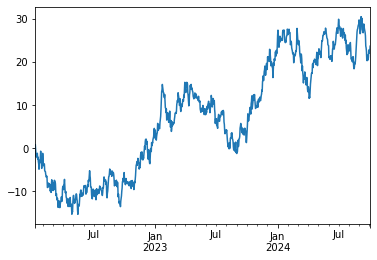

In [210]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('20220108',periods = 1000, freq='D'))
ts= ts.cumsum()
ts.plot()

In [211]:
import matplotlib.pyplot as plt

In [212]:
df = pd.DataFrame(np.random.randn(1000,4),
                  index = pd.date_range('20080808',periods = 1000),
                  columns=['A','B','C','D'])
df

,A,B,C,D
2008-08-08,-0.440532,0.169072,-1.123814,2.586637
2008-08-09,0.208878,0.373509,-0.783383,-0.214287
2008-08-10,1.242914,0.827560,-0.838922,-0.421371
2008-08-11,0.051640,0.419332,0.763250,-0.431421
2008-08-12,-0.351905,-0.127638,-0.465819,0.043904
...,...,...,...,...
2011-04-30,1.751588,-0.047174,1.790503,-1.037356
2011-05-01,-1.177053,-0.315078,1.257055,1.478473
2011-05-02,1.578147,1.755378,-0.466716,0.736873
2011-05-03,-0.534921,0.435916,0.473451,-0.737059


In [213]:
df = df.cumsum()
df

,A,B,C,D
2008-08-08,-0.440532,0.169072,-1.123814,2.586637
2008-08-09,-0.231654,0.542580,-1.907197,2.372350
2008-08-10,1.011260,1.370141,-2.746119,1.950979
2008-08-11,1.062900,1.789472,-1.982869,1.519558
2008-08-12,0.710995,1.661834,-2.448688,1.563462
...,...,...,...,...
2011-04-30,-19.986543,9.571711,-27.449690,50.711225
2011-05-01,-21.163596,9.256633,-26.192635,52.189698
2011-05-02,-19.585450,11.012011,-26.659350,52.926571
2011-05-03,-20.120371,11.447927,-26.185900,52.189512


<Figure size 432x288 with 0 Axes>

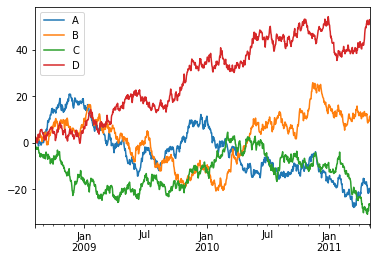

In [214]:
plt.figure()
df.plot()
plt.show()

## 数据输入、输出

In [215]:
df.to_csv('foo.csv')

In [217]:
dd = pd.read_csv('foo.csv')
print(dd.to_string())

     Unnamed: 0          A          B          C          D
0    2008-08-08  -0.440532   0.169072  -1.123814   2.586637
1    2008-08-09  -0.231654   0.542580  -1.907197   2.372350
2    2008-08-10   1.011260   1.370141  -2.746119   1.950979
3    2008-08-11   1.062900   1.789472  -1.982869   1.519558
4    2008-08-12   0.710995   1.661834  -2.448688   1.563462
5    2008-08-13   1.142750   0.562128  -2.662409   0.031127
6    2008-08-14   2.098493   2.294385  -2.693826  -0.058749
7    2008-08-15   0.436697   1.926519  -2.351448   0.639350
8    2008-08-16  -0.481495   1.910069  -1.845432   3.553593
9    2008-08-17  -1.132987   1.912250  -2.779418   3.574791
10   2008-08-18  -1.372379   1.013078  -3.208209   3.171570
11   2008-08-19   1.205253   2.960936  -4.333732   3.662208
12   2008-08-20   0.102759   3.347800  -4.600633   2.332867
13   2008-08-21  -0.176415   3.074839  -4.435456   3.058234
14   2008-08-22   0.220250   3.808693  -5.972705   4.576354
15   2008-08-23   0.282889   3.611486  -

### 转换为HDF5

In [219]:
df.to_hdf('foo.h5','df')

In [220]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2008-08-08,-0.440532,0.169072,-1.123814,2.586637
2008-08-09,-0.231654,0.542580,-1.907197,2.372350
2008-08-10,1.011260,1.370141,-2.746119,1.950979
2008-08-11,1.062900,1.789472,-1.982869,1.519558
2008-08-12,0.710995,1.661834,-2.448688,1.563462
...,...,...,...,...
2011-04-30,-19.986543,9.571711,-27.449690,50.711225
2011-05-01,-21.163596,9.256633,-26.192635,52.189698
2011-05-02,-19.585450,11.012011,-26.659350,52.926571
2011-05-03,-20.120371,11.447927,-26.185900,52.189512


In [221]:
df.head(10)

,A,B,C,D
2008-08-08,-0.440532,0.169072,-1.123814,2.586637
2008-08-09,-0.231654,0.542580,-1.907197,2.372350
2008-08-10,1.011260,1.370141,-2.746119,1.950979
2008-08-11,1.062900,1.789472,-1.982869,1.519558
2008-08-12,0.710995,1.661834,-2.448688,1.563462
2008-08-13,1.142750,0.562128,-2.662409,0.031127
2008-08-14,2.098493,2.294385,-2.693826,-0.058749
2008-08-15,0.436697,1.926519,-2.351448,0.639350
2008-08-16,-0.481495,1.910069,-1.845432,3.553593
2008-08-17,-1.132987,1.912250,-2.779418,3.574791


In [222]:
df.tail(6)

,A,B,C,D
2011-04-29,-21.738131,9.618885,-29.240193,51.748581
2011-04-30,-19.986543,9.571711,-27.449690,50.711225
2011-05-01,-21.163596,9.256633,-26.192635,52.189698
2011-05-02,-19.585450,11.012011,-26.659350,52.926571
2011-05-03,-20.120371,11.447927,-26.185900,52.189512
2011-05-04,-20.451058,11.219076,-26.840932,52.400610


## Excel格式

In [393]:
df.to_excel('foo.xlsx',sheet_name='Sheet1')

In [226]:
pd.read_excel('foo.xlsx','Sheet1',index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2008-08-08,-0.091580,1.207609,-1.556258,-0.916664
1,2008-08-09,-0.475984,-1.015754,-1.719749,-0.042512
2,2008-08-10,-0.502660,-0.428205,-3.664576,0.559310
3,2008-08-11,0.743195,-0.190013,-4.617324,-0.620351
4,2008-08-12,-0.161112,-0.452713,-7.035875,-0.879789
...,...,...,...,...,...
995,2011-04-30,44.397088,-10.277770,26.235449,-8.475884
996,2011-05-01,44.526344,-12.151070,25.661064,-8.570635
997,2011-05-02,43.133645,-11.494411,24.317592,-8.791857
998,2011-05-03,42.897366,-12.099546,23.976894,-8.637871


In [2]:
conda list

# packages in environment at E:\anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2022.05                  py39_0    defaults
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0    defaults
absl-py                   1.1.0                    pypi_0    pypi
activator                 1.7.15                   pypi_0    pypi
advancedfirebase          1.1.4                    pypi_0    pypi
aiohttp                   3.8.1            py39h2bbff1b_1    defaults
aiosignal                 1.2.0              pyhd3eb1b0_0    defaults
alabaster                 0.7.12             pyhd3eb1b0_0    defaults
anaconda                  custom                   py39_1    defaults
anaconda-client           1.10.0           py39haa95532_0    defaults
anaconda-navigator        2.1.4            py39haa95532_0    defaults
anaconda-project          0.11.0           py39haa95532_0    defaults
anyio                     3.5.0            py39haa95532_0   

mkl_random                1.2.2            py39hf11a4ad_0    defaults
mock                      4.0.3              pyhd3eb1b0_0    defaults
mpmath                    1.2.1            py39haa95532_0    defaults
msgpack-python            1.0.3            py39h59b6b97_0    defaults
msys2-conda-epoch         20160418                      1    defaults
multidict                 5.1.0            py39h2bbff1b_2    defaults
multipledispatch          0.6.0            py39haa95532_0    defaults
munkres                   1.1.4                      py_0    defaults
mypy_extensions           0.4.3            py39haa95532_1    defaults
navigator-updater         0.2.1                    py39_1    defaults
nbclassic                 0.3.5              pyhd3eb1b0_0    defaults
nbclient                  0.5.13           py39haa95532_0    defaults
nbconvert                 6.4.4            py39haa95532_0    defaults
nbformat                  5.3.0            py39haa95532_0    defaults
nest-asyncio        

In [3]:
conda install os

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - os

Current channels:

  - https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/win-64
  - https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
import os

In [5]:
 path='C:/yyy/yyy_data/'
print(os.path.join(path,'/abc'))

C:/abc


In [6]:
os.getcwd()

'C:\\Users\\11947\\Python_learn\\padans'